C:\Users\mrkkokku\AppData\Local\Temp/ipykernel_6464/615507626.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(requests.get(page_url, headers={'User-agent': 'Mozilla/5.0'}).text)[0])
C:\Users\mrkkokku\AppData\Local\Temp/ipykernel_6464/615507626.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(requests.get(page_url, headers={'User-agent': 'Mozilla/5.0'}).text)[0])
C:\Users\mrkkokku\AppData\Local\Temp/ipykernel_6464/615507626.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(requests.get(page_url, headers={'User-agent': 'Mozilla/5.0'}).text)[0])
C:\Users\mrkkokku\AppData\Local\Temp/ipykernel_6464/615507626.py:39: FutureWarning: The 

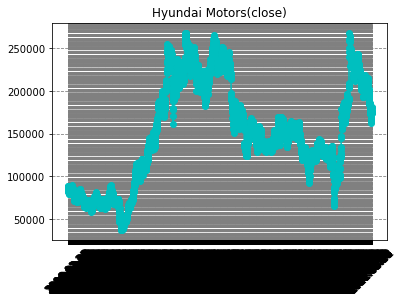

In [25]:
# OHLC와 캔들차트
# OHLC는 Open-High-Low-Close를 나타내며, 
#        시가-고가-저가-종가를 의미한다.
# 캔들차트는 OHLC 4요소로 일정기간의 가격변동을 표기한다.

# 한번에 모두 그리기는 복잡하니
# 종가로만 차트를 그려보자
# 최근 30개 종가데이터를 이용하며(약 1.5개월 분량)
# x축은 날짜, y축은 종가

# 이 코드는 추후 최적화 좀 하자
# concat이랑 indexing 처리좀 해야할 듯 하다.


from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib import request

headers = ('User-Agent','Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.82 Safari/537.36')
url = 'https://finance.naver.com/item/sise_day.naver?code=068760&page=1'
opener = request.build_opener()
opener.addheaders = [headers]
response = opener.open(url)

html = BeautifulSoup(response, 'lxml')
pgrr = html.find('td', class_='pgRR')

s = str(pgrr.a['href']).split('=')
last_page = s[-1]

import pandas as pd
from pandas import concat
import requests

df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.naver?code=005380'

for page in range(399, int(last_page)+1):
    page_url = '{}&page={}'.format(sise_url, page)
    df = df.append(pd.read_html(requests.get(page_url, headers={'User-agent': 'Mozilla/5.0'}).text)[0])
    

df = df.dropna() # 값이 없는 행을 제거한다

df.iloc[0:30]
df = df.sort_values(by='날짜')

from matplotlib import pyplot as plt

plt.title('Hyundai Motors(close)')
plt.xticks(rotation=45)
plt.plot(df['날짜'], df['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()